In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [2]:
df = pd.read_excel('Test Sample.xlsx', parse_dates=['dt'])

# Data Cleaning
## Converting columns to best possible dtypes
df = df.convert_dtypes()
## Dropping duplicates
print(f'Row counts with duplicates: {df.shape[0]}')
df.drop_duplicates(subset=df.columns[1:], inplace=True)
print(f'Row counts without duplicates: {df.shape[0]}')

Row counts with duplicates: 15363
Row counts without duplicates: 15357


In [3]:
df.head(3)

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,<NA>,<NA>,UMID,26,GMAIL.COM,Private Company Employee,20000,Bank,Android,0
1,0,2020-12-14,1,3,4,UMID,32,GMAIL.COM,Other,18000,E-wallet,Android,1
2,1,2021-01-26,0,0,3,SSS,41,YAHOO.COM,Private Company Employee,14000,Bank,Android,1


In [4]:
print('"Null" value proportions of columns:')
print(df.isna().mean())

"Null" value proportions of columns:
fpd5_flg                 0.00
dt                       0.00
gender                   0.00
device_quaility_index    0.04
behavioral_index         0.04
type_of_document         0.00
age                      0.00
email_domain_formatted   0.00
social_status            0.00
salary                   0.05
disbursment_type         0.00
os                       0.00
email_index              0.00
dtype: float64


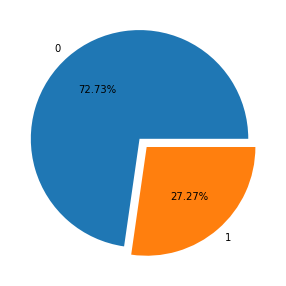

In [5]:
# Pie chart of "target"
plt.figure(figsize=(5,5))
target_statistics = df.fpd5_flg.value_counts()
plt.pie(target_statistics.values, labels=target_statistics.index,
        autopct='%1.2f%%', explode=[0.05 for i in range(len(target_statistics))])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15357 entries, 0 to 15362
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fpd5_flg                15357 non-null  Int64         
 1   dt                      15357 non-null  datetime64[ns]
 2   gender                  15357 non-null  Int64         
 3   device_quaility_index   14792 non-null  Int64         
 4   behavioral_index        14792 non-null  Int64         
 5   type_of_document        15357 non-null  string        
 6   age                     15357 non-null  Int64         
 7   email_domain_formatted  15357 non-null  string        
 8   social_status           15357 non-null  string        
 9   salary                  14643 non-null  Int64         
 10  disbursment_type        15357 non-null  string        
 11  os                      15341 non-null  string        
 12  email_index             15324 non-null  Int64 

## Relationships

In [7]:
datetime_features = ['dt']
continuous_features = ['age','salary']
discrete_features = ['gender','device_quaility_index','behavioral_index','email_index']
categorical_features = ['type_of_document','email_domain_formatted','social_status','disbursment_type','os']

### Datetime Features with Target

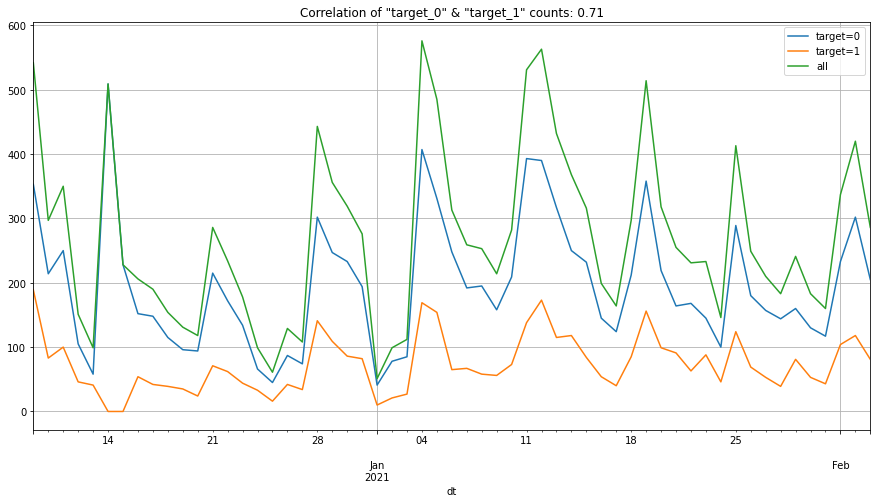

In [8]:
# Preprocessing
df_datetime_features = pd.concat([df[datetime_features],df['fpd5_flg']], axis=1)
x1 = df_datetime_features[df_datetime_features.fpd5_flg==0].groupby('dt').agg('count')
x2 = df_datetime_features[df_datetime_features.fpd5_flg==1].groupby('dt').agg('count')
grouped_datetime = pd.concat([x1,x2], axis=1)
grouped_datetime.columns = ['target_0','target_1']
grouped_datetime.fillna(0, inplace=True)

# Line chart
plt.figure(figsize=(15,7.5))
grouped_datetime.target_0.plot(kind='line', label='target=0')
grouped_datetime.target_1.plot(kind='line', label='target=1')
(grouped_datetime.target_0 + grouped_datetime.target_1).plot(kind='line', label='all')
plt.title(f'Correlation of "target_0" & "target_1" counts: {round(grouped_datetime.corr().iloc[0,1], 2)}')
plt.legend()
plt.grid()
plt.show()

**Note**: There are 2 days of "zero" counts in *target_1* column. Maybe people were taking loans for small amounts

### Continuous Features with Target

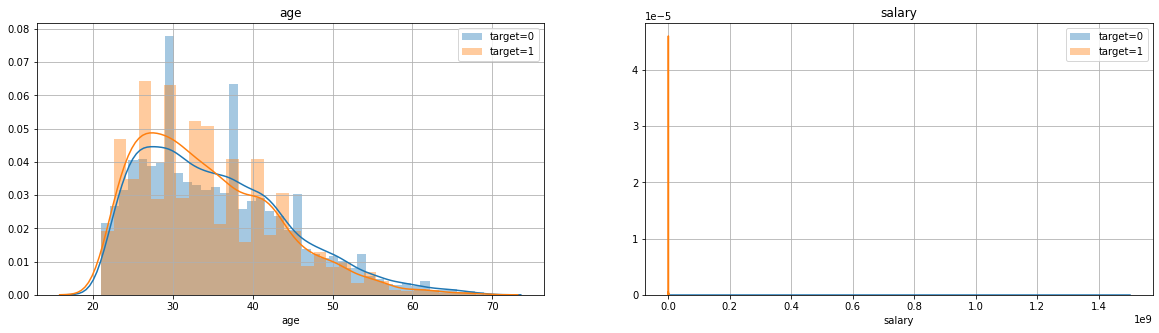

In [9]:
# Preprocessing
df_continuous_features = pd.concat([df[continuous_features],df['fpd5_flg']], axis=1)

# Distribution plots
f, ax = plt.subplots(1, 2, figsize=(20,5))
## "age"
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==0].age, label='target=0', ax=ax[0])
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==1].age, label='target=1', ax=ax[0])
ax[0].set_title('age')
ax[0].legend()
ax[0].grid()
## "salary"
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==0].salary.dropna(), label='target=0', ax=ax[1])
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==1].salary.dropna(), label='target=1', ax=ax[1])
ax[1].set_title('salary')
ax[1].legend()
ax[1].grid()
plt.show()

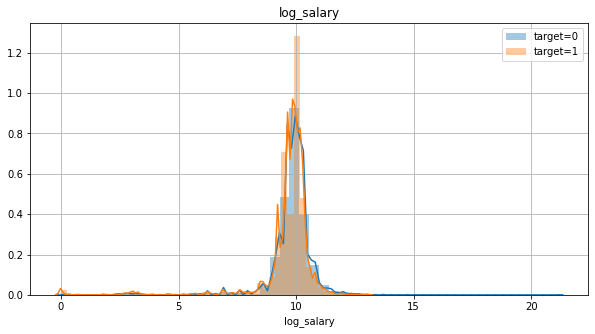

In [10]:
# Preprocessing
df_continuous_features['log_salary'] = np.log(df_continuous_features.salary+1)

# Distribution plots
## "salary"
plt.figure(figsize=(10,5))
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==0].log_salary.dropna(), label='target=0')
sns.distplot(df_continuous_features[df_continuous_features.fpd5_flg==1].log_salary.dropna(), label='target=1')
plt.title('log_salary')
plt.legend()
plt.grid()
plt.show()

In [11]:
df['log_salary'] = np.log(df.salary+1)
df_continuous_features.groupby('fpd5_flg').salary.describe()

,count,mean,std,min,25%,50%,75%,max
fpd5_flg,,,,,,,,
0,10653.00,165417.30,14532999.07,0.00,15000.00,20000.00,27000.00,1500020000.00
1,3990.00,21526.75,19200.37,0.00,15000.00,20000.00,25000.00,450000.00


**Note**: In the modeling process, "salary" be inside of the logarithm. It will be more convenient for logistic regression.

### Discrete Features with Target

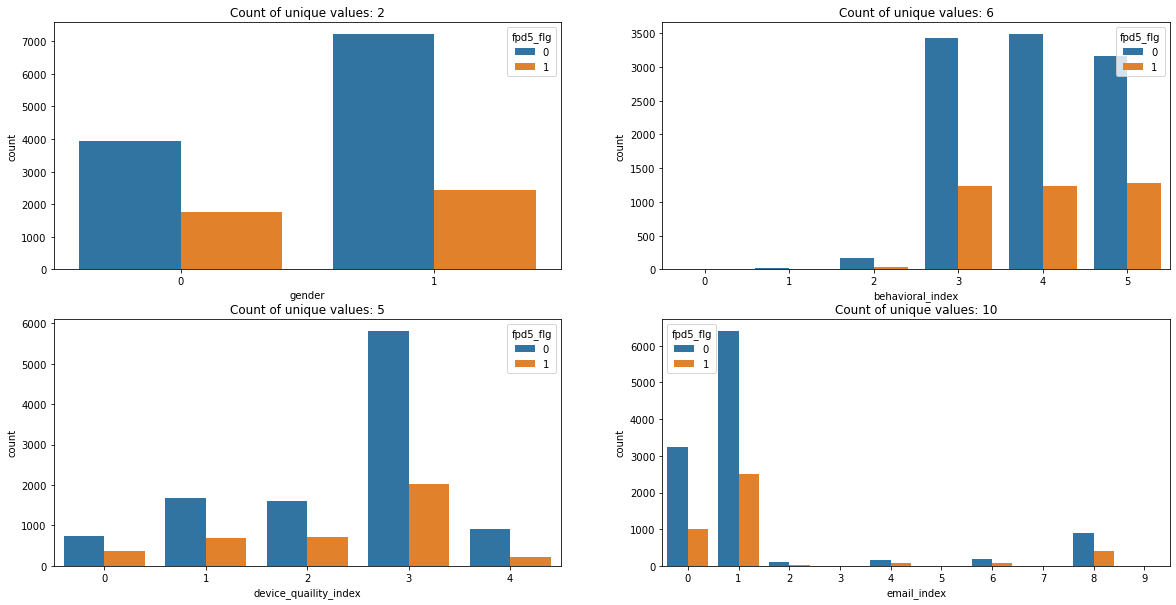

In [12]:
# Preprocessing
df_discrete_features = pd.concat([df[discrete_features],df['fpd5_flg']], axis=1)

# Bar charts
f, ax = plt.subplots(2,2, figsize=(20,10))
for i, column in enumerate(discrete_features):
    df_i = df_discrete_features.dropna(subset=[column])
    sns.countplot(x=column, hue='fpd5_flg',
                  order=[i for i in range(len(df_i[column].unique()))],
                  data=df_i, ax=ax[i%2][i//2])
    ax[i%2][i//2].set_title(f'Count of unique values: {len(df_i[column].unique())}')
plt.show()

### Categorical Features with Target

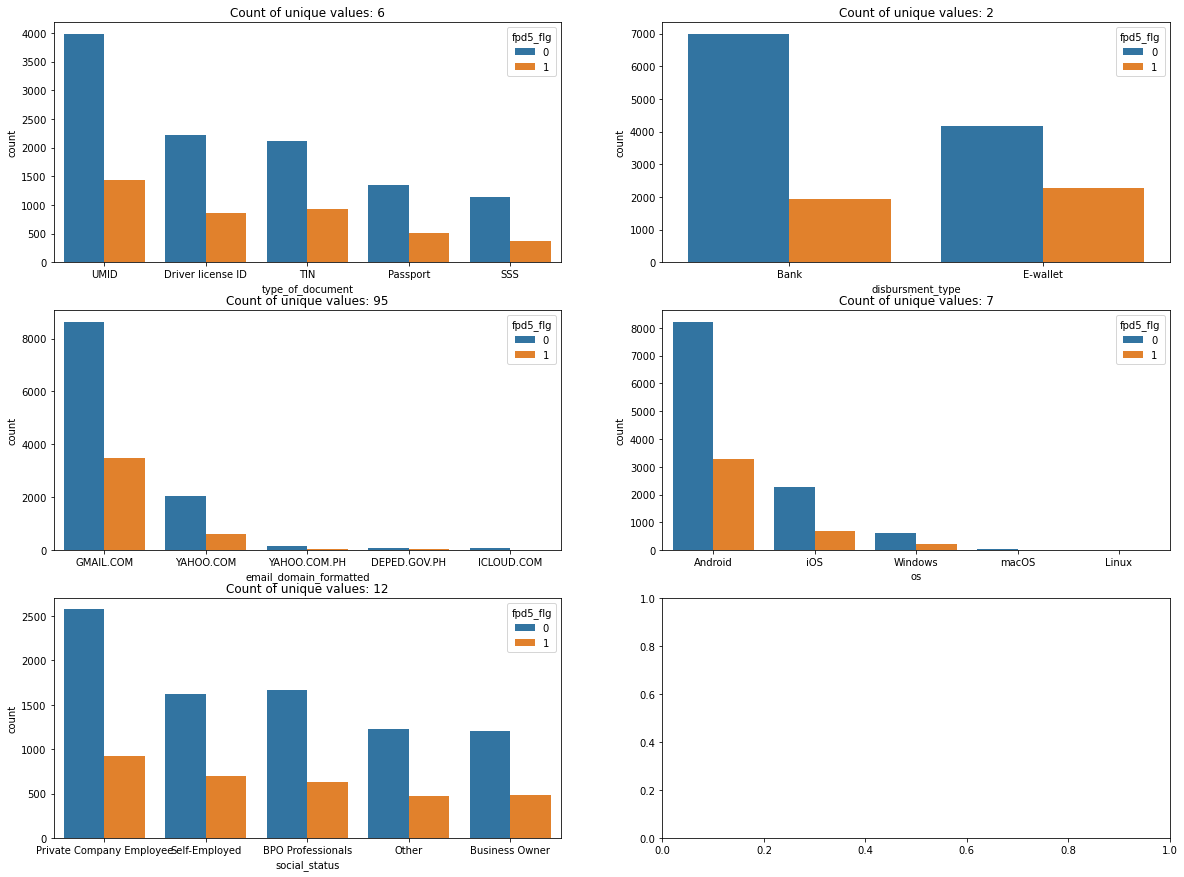

In [13]:
# Preprocessing
df_categorical_features = pd.concat([df[categorical_features],df['fpd5_flg']], axis=1)

# Bar charts
f, ax = plt.subplots(3,2, figsize=(20,15))
for i, column in enumerate(categorical_features):
    df_i = df_categorical_features.dropna(subset=[column])
    sns.countplot(x=column, hue='fpd5_flg',
                  order=df_i[column].value_counts().iloc[:5].index,
                  data=df_i, ax=ax[i%3][i//3])
    ax[i%3][i//3].set_title(f'Count of unique values: {len(df_i[column].unique())}')
plt.show()

**Note**: Some of the discrete and categorical features have lots of unique values. I prefer to drop these features.

# Modelling

In [14]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from help_functions import CyclicalFeatureEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, \
    plot_precision_recall_curve, roc_auc_score, plot_roc_curve, f1_score

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.pipeline import Pipeline as Pipeline_imb

- SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
- Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [16]:
# Preprocessing
## Datetime Features
datetime_features = ['dt']
datetime_pipeline = Pipeline(steps=[
    ('transform', CyclicalFeatureEncoder())
])
## Continuous Features
continuous_features = ['age','log_salary']
continuous_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])
## Discrete Features
discrete_features = ['gender','device_quaility_index','behavioral_index','email_index']
discrete_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scale', MinMaxScaler())
])
## Categorical Features
categorical_features = ['type_of_document','social_status','disbursment_type','os']
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [17]:
# Column Transformer
full_processor = ColumnTransformer(transformers=[
    ('datetime', datetime_pipeline, datetime_features),
    ('continuous', continuous_pipeline, continuous_features),
    ('discrete', discrete_pipeline, discrete_features),
    ('categorical', categorical_pipeline, categorical_features)
], n_jobs=-1)

In [18]:
# Imbalance Learning
## Under-sampling
tl = TomekLinks(sampling_strategy='majority')
## Over-sampling
smote = SMOTE(sampling_strategy=0.6)

In [19]:
# Preprocessing the data
df.replace({pd.NA: np.nan}, inplace=True)
X = df.drop(columns=['fpd5_flg'])
y = df['fpd5_flg'].astype(int)

# Cross-Validation
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [20]:
%%time
# Model pipeline
model = LogisticRegression(max_iter=300, n_jobs=-1)
model_pipeline = Pipeline_imb(steps=[
    ('processor', full_processor),
    ('under_sampler', tl),
    ('over_sampler', smote),
    ('model', model)
])

# Fitting the model
_ = model_pipeline.fit(train_x, train_y)

Wall time: 6.34 s


### Results

In [21]:
# Classification report
print(f'train: \n{classification_report(train_y, model_pipeline.predict(train_x))}\n')
print(f'test: \n{classification_report(test_y, model_pipeline.predict(test_x))}')

train: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      7815
           1       0.42      0.25      0.32      2934

    accuracy                           0.70     10749
   macro avg       0.59      0.56      0.56     10749
weighted avg       0.66      0.70      0.67     10749


test: 
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3354
           1       0.41      0.25      0.31      1254

    accuracy                           0.70      4608
   macro avg       0.58      0.56      0.56      4608
weighted avg       0.66      0.70      0.67      4608



- $Precision = \frac{TP}{TP+FP}$
- $Recall = \frac{TP}{TP+FN}$

In [22]:
# Confusion matrix
print(f'train: \n{confusion_matrix(train_y, model_pipeline.predict(train_x), normalize="all")}\n')
print(f'test: \n{confusion_matrix(test_y, model_pipeline.predict(test_x), normalize="all")}')

train: 
[[0.63159364 0.09545074]
 [0.20355382 0.0694018 ]]

test: 
[[0.62868924 0.09917535]
 [0.20399306 0.06814236]]


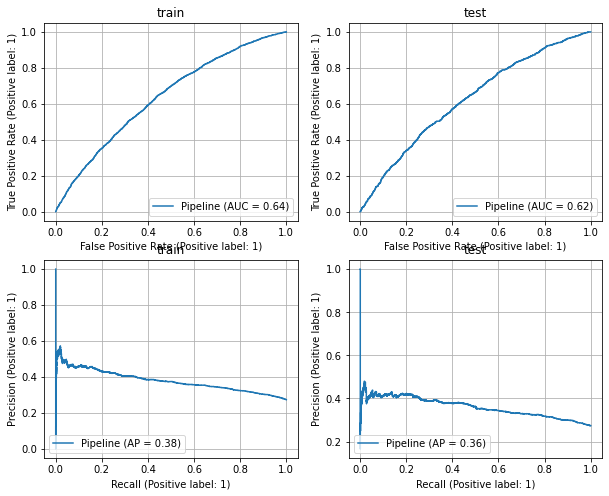

In [23]:
# Roc Curve & Precision/Recall curve
f, ax = plt.subplots(2, 2, figsize=(10, 8))

plot_roc_curve(model_pipeline, train_x, train_y, ax=ax[0][0])
ax[0][0].set_title('train')
ax[0][0].grid(True)

plot_roc_curve(model_pipeline, test_x, test_y, ax=ax[0][1])
ax[0][1].set_title('test')
ax[0][1].grid(True)

plot_precision_recall_curve(model_pipeline, train_x, train_y, ax=ax[1][0])
ax[1][0].set_title('train')
ax[1][0].grid(True)

plot_precision_recall_curve(model_pipeline, test_x, test_y, ax=ax[1][1])
ax[1][1].set_title('test')
ax[1][1].grid(True)

plt.show()

## Neural Network

In [24]:
%%time
# Model pipeline
nn_model = MLPClassifier()
nn_model_pipeline = Pipeline_imb(steps=[
    ('processor', full_processor),
    ('under_sampler', tl),
    ('over_sampler', smote),
    ('nn_model', nn_model)
])

# Grid Search
## Hyper-parameters of the model
params = {
    'nn_model__activation': ['relu', 'tanh'],
    'nn_model__hidden_layer_sizes':[100, 200, [100, 100], [200, 200]],
    'nn_model__alpha': [0.0001, 0.1, 1],
    'nn_model__learning_rate':['adaptive'],
    'nn_model__max_iter': [300],
    'nn_model__early_stopping': [True]}
## Applying the GridSearch
search = GridSearchCV(nn_model_pipeline, params, cv=5, scoring=f1_score).fit(train_x, train_y)
## Result of the GridSearch
search.best_params_

Wall time: 5min 26s


{'nn_model__activation': 'relu',
 'nn_model__alpha': 0.0001,
 'nn_model__early_stopping': True,
 'nn_model__hidden_layer_sizes': 100,
 'nn_model__learning_rate': 'adaptive',
 'nn_model__max_iter': 300}

In [25]:
%%time
# Model pipeline
nn_model = MLPClassifier(activation='relu', alpha=0.0001, early_stopping=True,
                        hidden_layer_sizes=[100], learning_rate='adaptive', max_iter=300)
nn_model_pipeline = Pipeline_imb(steps=[
    ('processor', full_processor),
    ('under_sampler', tl),
    ('over_sampler', smote),
    ('nn_model', nn_model)
])

# Fitting the model
_ = nn_model_pipeline.fit(train_x, train_y)

Wall time: 3.27 s


### Results

In [26]:
# Classification report
print(f'train: \n{classification_report(train_y, nn_model_pipeline.predict(train_x))}\n')
print(f'test: \n{classification_report(test_y, nn_model_pipeline.predict(test_x))}')

train: 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      7815
           1       0.42      0.19      0.26      2934

    accuracy                           0.71     10749
   macro avg       0.59      0.55      0.54     10749
weighted avg       0.66      0.71      0.67     10749


test: 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      3354
           1       0.42      0.20      0.27      1254

    accuracy                           0.71      4608
   macro avg       0.58      0.55      0.54      4608
weighted avg       0.66      0.71      0.67      4608



- $Precision = \frac{TP}{TP+FP}$
- $Recall = \frac{TP}{TP+FN}$

In [27]:
# Confusion matrix
print(f'train: \n{confusion_matrix(train_y, nn_model_pipeline.predict(train_x), normalize="all")}\n')
print(f'test: \n{confusion_matrix(test_y, nn_model_pipeline.predict(test_x), normalize="all")}')

train: 
[[0.6556889  0.07135547]
 [0.22057866 0.05237697]]

test: 
[[0.65299479 0.07486979]
 [0.21896701 0.0531684 ]]


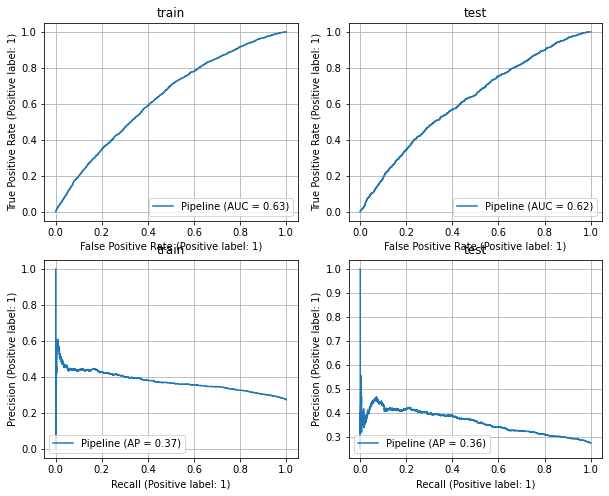

In [28]:
# Roc Curve & Precision/Recall curve
f, ax = plt.subplots(2, 2, figsize=(10, 8))

plot_roc_curve(nn_model_pipeline, train_x, train_y, ax=ax[0][0])
ax[0][0].set_title('train')
ax[0][0].grid(True)

plot_roc_curve(nn_model_pipeline, test_x, test_y, ax=ax[0][1])
ax[0][1].set_title('test')
ax[0][1].grid(True)

plot_precision_recall_curve(nn_model_pipeline, train_x, train_y, ax=ax[1][0])
ax[1][0].set_title('train')
ax[1][0].grid(True)

plot_precision_recall_curve(nn_model_pipeline, test_x, test_y, ax=ax[1][1])
ax[1][1].set_title('test')
ax[1][1].grid(True)

plt.show()

## Saving Results

In [29]:
# Preprocessing
df = pd.read_excel('Test Sample.xlsx', parse_dates=['dt'])
df['log_salary'] = np.log(df.salary+1)
df = df[train_x.columns]
df = df.convert_dtypes()
df.replace({pd.NA: np.nan}, inplace=True)
# Saving Results
prob = pd.DataFrame(model_pipeline.predict_proba(df)[:, 1], columns=['prob'])
df = pd.read_excel('Test Sample.xlsx')
df = pd.concat([df, prob], axis=1)
df.to_excel('result.xlsx', index=False)